In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
df=pd.read_csv("sales_data.csv")

In [4]:
df.head()

,Product,Price per Unit,Units Sold,Total Sales,Timestamp
0,Vegetables,20.16,9,181.47,2024-11-27 10:33:28
1,Rice,32.32,66,2133.00,2024-11-27 10:33:28
2,Fruits,14.58,51,743.71,2024-11-27 10:33:28
3,Rice,27.34,63,1722.70,2024-11-27 10:33:28
4,Fruits,24.25,79,1915.93,2024-11-27 10:33:28


In [8]:
df.shape

(10000, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product         10000 non-null  object 
 1   Price per Unit  10000 non-null  float64
 2   Units Sold      10000 non-null  int64  
 3   Total Sales     10000 non-null  float64
 4   Timestamp       10000 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


In [10]:
df.describe()

,Price per Unit,Units Sold,Total Sales
count,10000.000000,10000.000000,10000.000000
mean,22.732303,50.107500,1142.355835
std,11.437556,28.932032,934.331569
min,5.010000,1.000000,5.100000
25%,12.980000,25.000000,409.880000
50%,21.500000,49.500000,893.090000
75%,29.950000,75.000000,1652.255000
max,49.990000,100.000000,4962.310000


In [11]:
df.isnull().sum()

Product           0
Price per Unit    0
Units Sold        0
Total Sales       0
Timestamp         0
dtype: int64

In [47]:
df.dtypes

Product            object
Price per Unit    float64
Units Sold          int64
Total Sales       float64
Timestamp          object
dtype: object

In [12]:
df.columns

Index(['Product', 'Price per Unit', 'Units Sold', 'Total Sales', 'Timestamp'], dtype='object')

In [52]:
df['Product'].value_counts()

Vegetables    1703
Fruits        1702
Rice          1697
Bread         1652
Eggs          1648
Milk          1593
Name: Product, dtype: int64

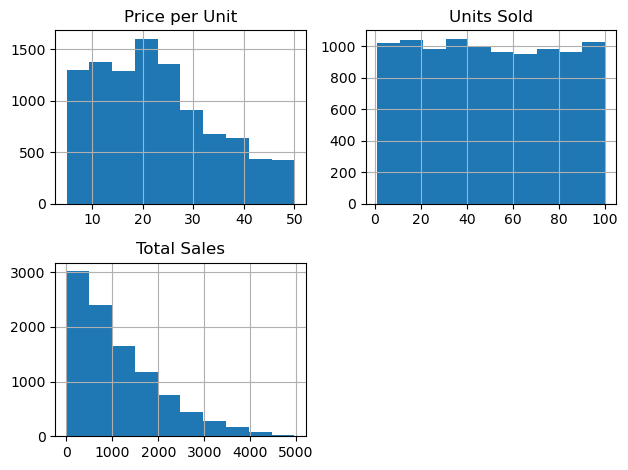

In [53]:
df.hist()
plt.tight_layout()

In [14]:
import seaborn as sns

<Axes: xlabel='Product', ylabel='count'>

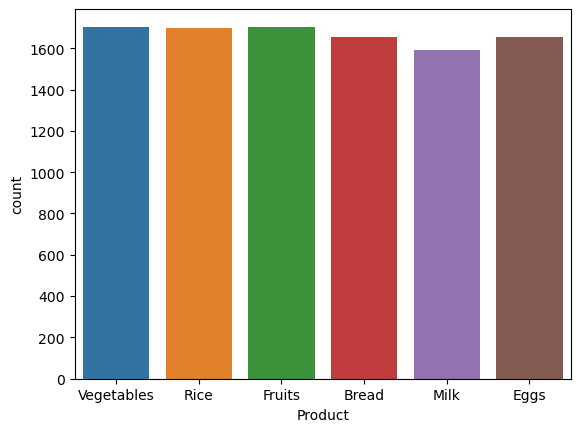

In [15]:
sns.countplot(df,x='Product')

<Axes: >

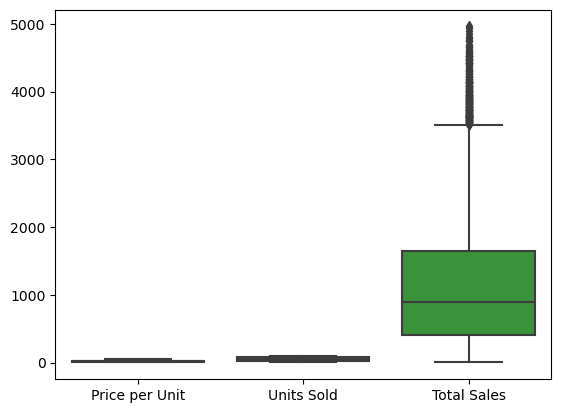

In [16]:
sns.boxplot(df)

<Axes: xlabel='Total Sales', ylabel='Units Sold'>

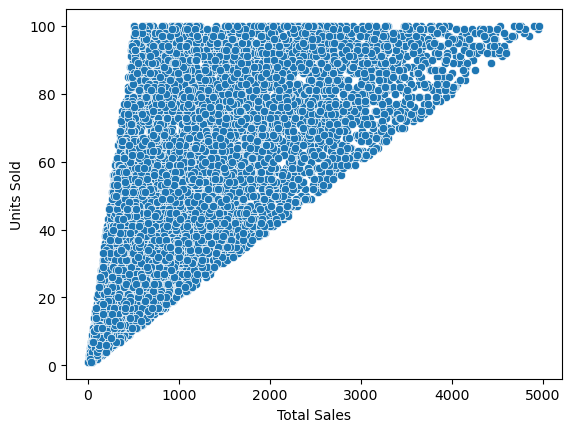

In [20]:
sns.scatterplot(df,x="Total Sales",y="Units Sold")

<Axes: ylabel='Product'>

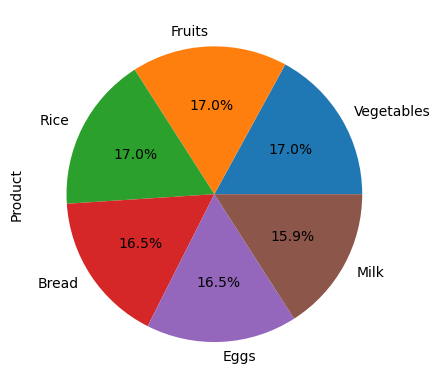

In [21]:
df['Product'].value_counts().plot(kind='pie',autopct="%1.1f%%")

<Axes: xlabel='Total Sales', ylabel='Density'>

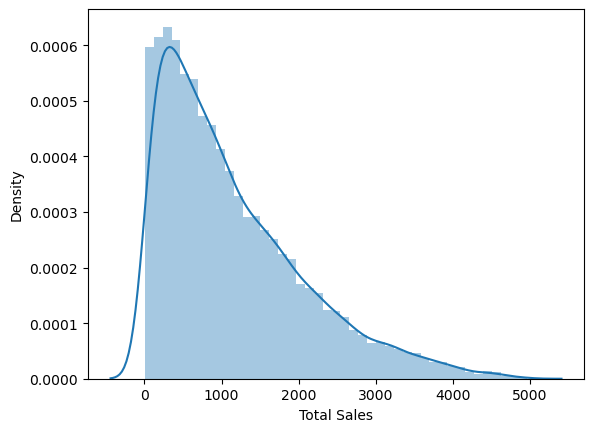

In [25]:
sns.distplot(df['Total Sales'])

<Axes: xlabel='Price per Unit', ylabel='Density'>

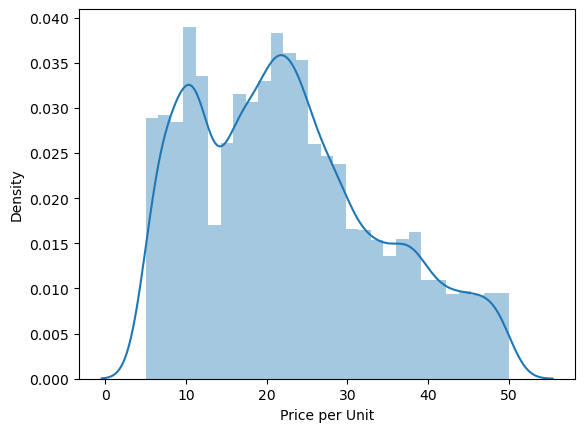

In [26]:
sns.distplot(df['Price per Unit'])

In [69]:
df.skew()

Price per Unit    0.480884
Units Sold        0.029696
Total Sales       1.138880
dtype: float64

In [42]:
df.duplicated().sum()

5

In [43]:
df = df.drop_duplicates()

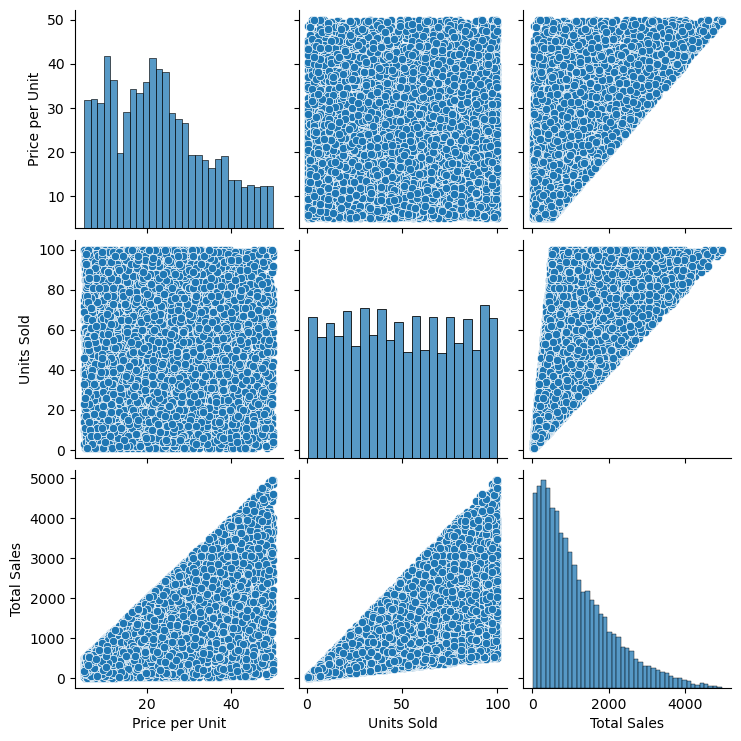

In [45]:
sns.pairplot(df)

In [49]:
col1=["Product","Price per Unit","Units Sold","Total Sales"]

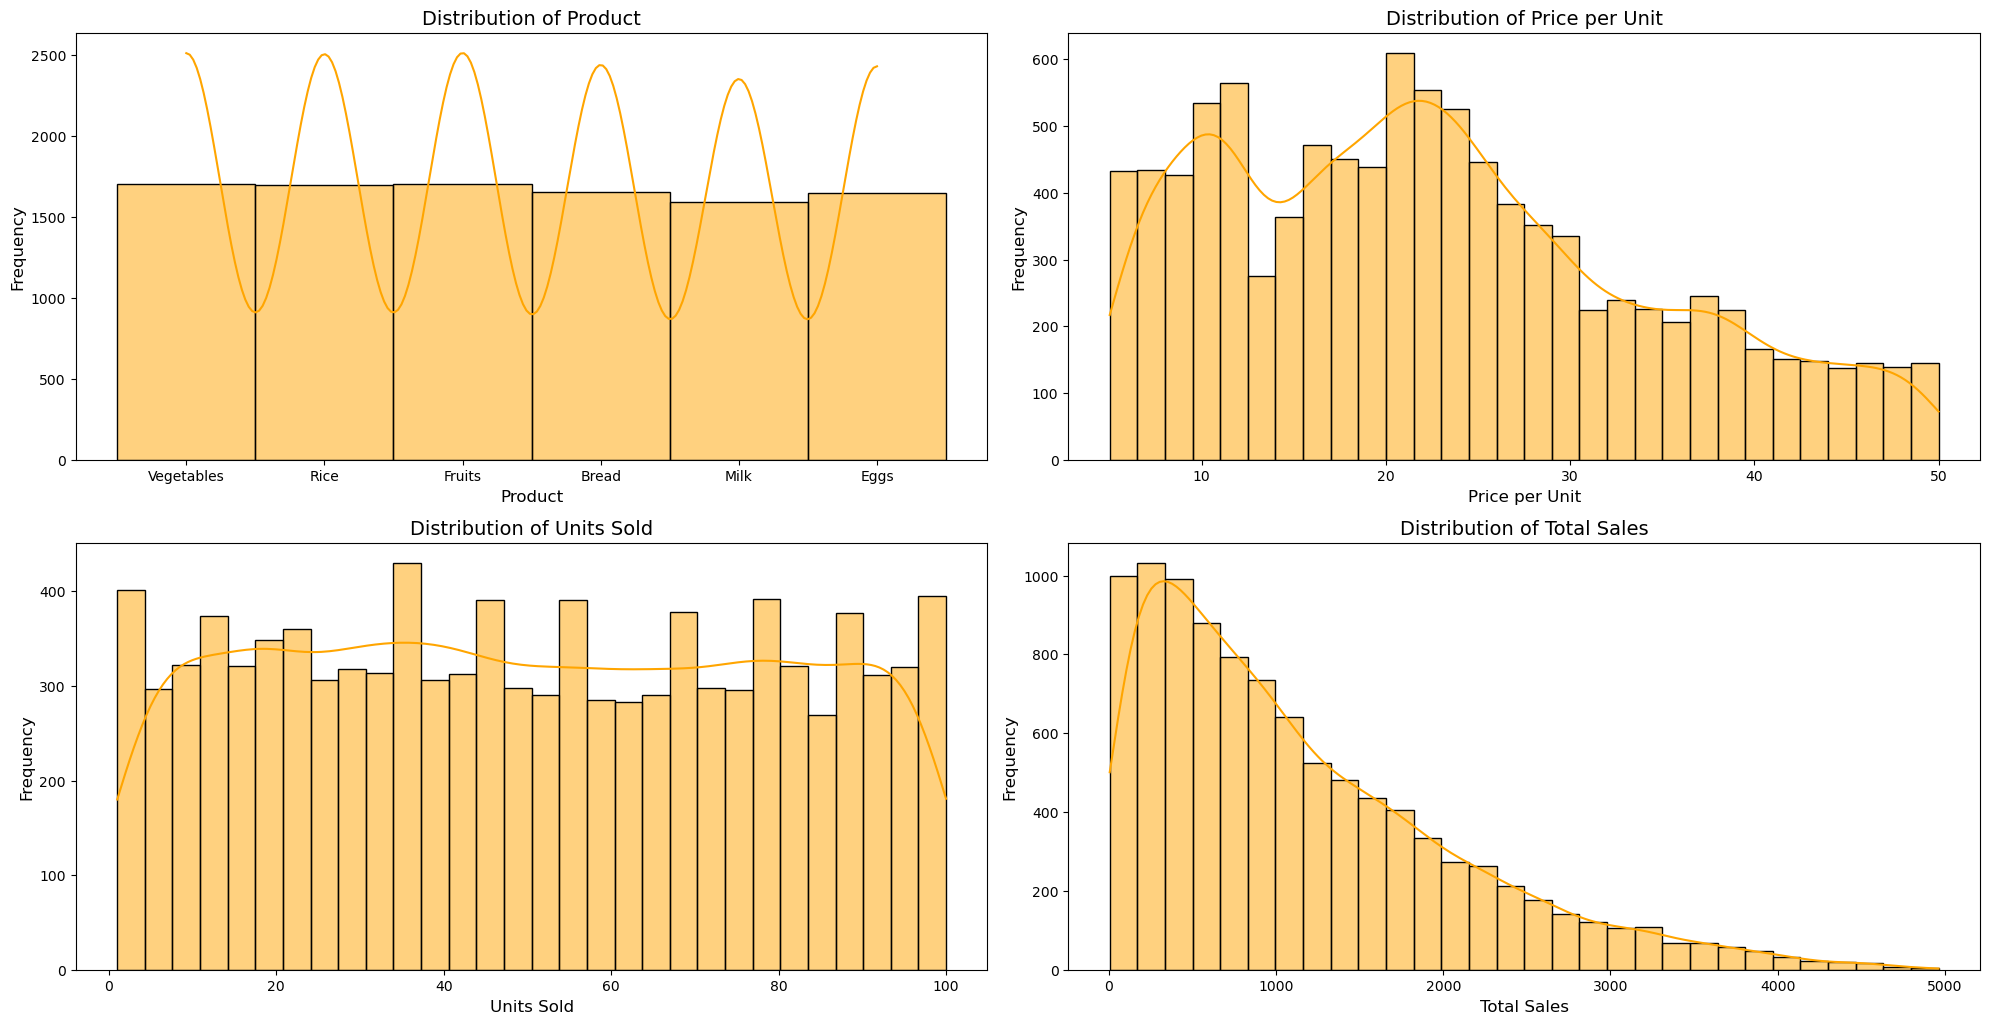

In [50]:
plt.figure(figsize=(20, 15))

for i, col in enumerate(col1, start=1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='orange')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

In [56]:
df.corr()

,Price per Unit,Units Sold,Total Sales
Price per Unit,1.000000,0.009705,0.614333
Units Sold,0.009705,1.000000,0.711737
Total Sales,0.614333,0.711737,1.000000


<Axes: >

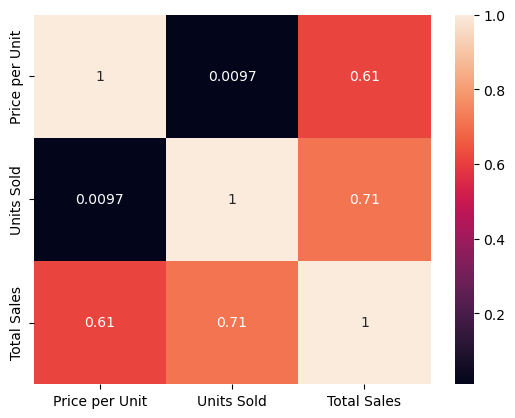

In [57]:
sns.heatmap(df.corr(),annot=True)

In [78]:
X = df[["Units Sold","Price per Unit"]]
y = df["Total Sales"]

In [76]:
X1=df[["Units Sold","Price per Unit"]]
X1

,Units Sold,Price per Unit
0,9,20.16
1,66,32.32
2,51,14.58
3,63,27.34
4,79,24.25
...,...,...
9995,6,33.19
9996,63,49.66
9997,7,8.10
9998,46,45.71


In [75]:
y

0        181.47
1       2133.00
2        743.71
3       1722.70
4       1915.93
         ...   
9995     199.17
9996    3128.37
9997      56.70
9998    2102.57
9999     481.98
Name: Total Sales, Length: 9995, dtype: float64

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [81]:
y_pred = regressor.predict(X_test)
y_pred

array([ 358.52116564,  719.74746149, 1661.48609836, ..., 1063.10981523,
       1984.47791855, 1439.06229328])

In [82]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 106023.12909558124
R^2 Score: 0.8791842740212688


In [67]:
results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

In [68]:
results.to_csv("regression_results.csv", index=False)
print("Predictions saved as 'regression_results.csv'")

Predictions saved as 'regression_results.csv'


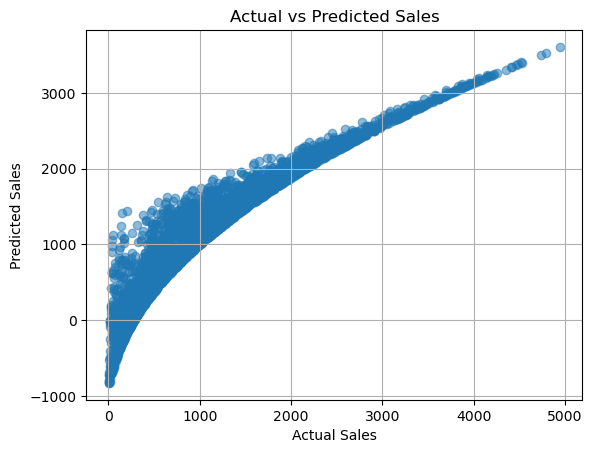

In [65]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid()
plt.show()

In [66]:
joblib.dump(regressor, "regression_model.pkl")

['regression_model.pkl']